In [1]:
import os 
import tensorflow as tf
from tensorflow.python.client import device_lib
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from codes.utils import detections, predict_img, predict_img_cycle
from codes.models import sai_model, Generator, Discriminators
from codes.detection import Img_localize

test_model = sai_model()
test_model.load_weights("./check_classification/my_checkpoint")

In [3]:
OUTPUT_CHANNELS = 1

generator_g = Generator()
generator_f = Generator()

discriminator_x = Discriminators()
discriminator_y = Discriminators()

generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_path = "./checkpoints_cycle"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt.restore(tf.train.latest_checkpoint(checkpoint_path))

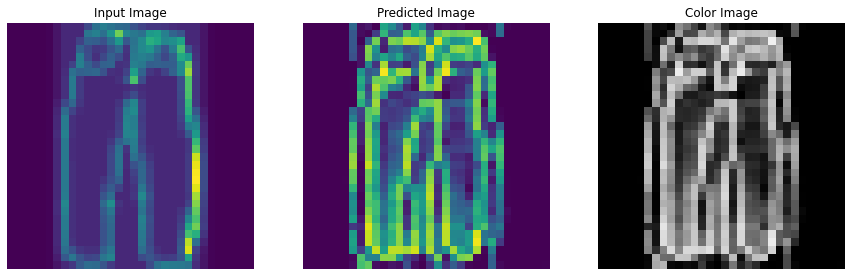

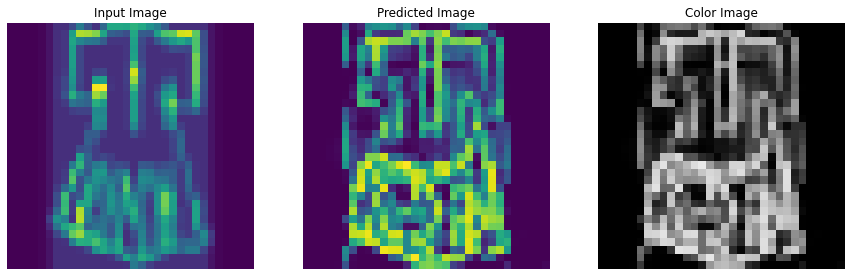

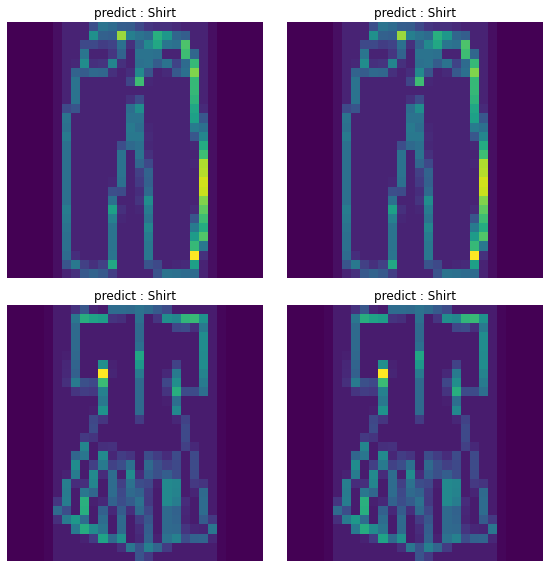

In [4]:
path = os.path.join(os.getcwd(), 'img/test1.png')
imgs = Img_localize(path, 2, "absorption")

for img in imgs:
    predict_img(generator_g, img)
predict_img_cycle(imgs, test_model, generator_g)

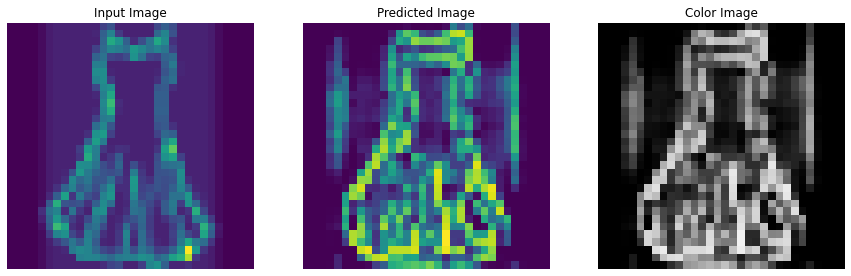

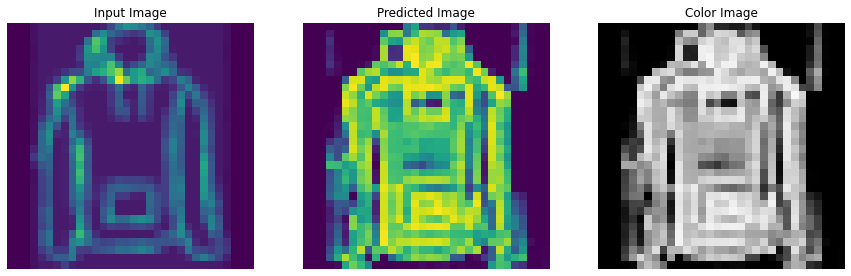

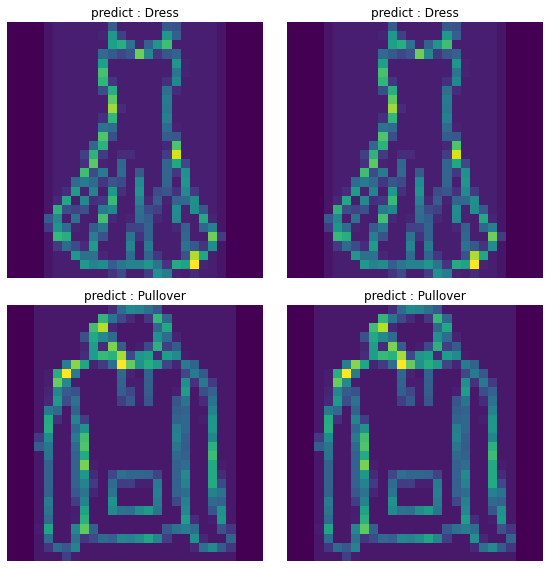

In [5]:
path = os.path.join(os.getcwd(), 'img/test2.png')
imgs = Img_localize(path, 2, "absorption")

for img in imgs:
    predict_img(generator_g, img)
predict_img_cycle(imgs, test_model, generator_g)